## Routine for background mask for noise determination
### noise_background_mask_2d

In [1]:
from __future__ import division, print_function

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from dcmfetch import fetch_series
from mriqa.dcmio import phase_enc_dirn
from mriqa.phantoms import noise_background_mask_2d

patid = 'PQACRK20161215'
studyid = '1'
series = {
    'Signal': [26, 30],
    'Signal_Combined': [27, 31],
    'Noise': [22, 24],
    'Noise_Combined': [23, 25],
    'Geometry': [28, 32]
}

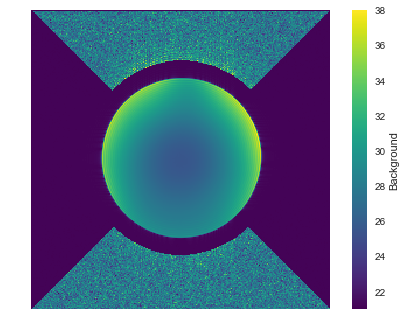

In [3]:
dobjs = sorted(
    fetch_series(patid, studyid, sernos=series['Geometry']),
    key=lambda x: int(x.SeriesNumber)
)
normalised_image = np.array([d.pixel_array for d in dobjs]).mean(axis=0)

dobjs = sorted(
    fetch_series(patid, studyid, sernos=series['Signal_Combined']),
    key=lambda x: int(x.SeriesNumber)
)
raw_image = np.array([d.pixel_array for d in dobjs]).mean(axis=0)

pe = phase_enc_dirn(dobjs[0])

mask = noise_background_mask_2d(normalised_image, phase_encoding=pe, margin=12)

# Siemens Bug Fix
assert np.sum(mask[0, :]) == 0
assert np.sum(mask[:, 0]) == 0

background_roi = np.ma.masked_where(~mask, raw_image)
foreground_roi = np.ma.masked_where(mask, raw_image)

plt.imshow(background_roi, cmap='viridis')
plt.grid(False)
plt.axis('off')
plt.colorbar(label='Background')
plt.imshow(foreground_roi, cmap='viridis');